In [1]:
import pandas as pd

In [2]:
import numpy as np

## 1. 데이터 불러오기 / 병합하기

#### poem 데이터를 불러오자

In [3]:
df = pd.read_csv("PoetryFoundationData.csv")

출처:kaggle data (poem data from Poetry Foundation)

In [4]:
df.head()

,Unnamed: 0,Title,Poem,Poet,Tags
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN


Title/ Poem / Poet / Tags columns가 있다. 우리는 시의 내용(Poem)과 시인의 성별(Poet-> gender)에 대한 관련성을 살펴보고 싶다.

In [5]:
df.shape

(13854, 5)

각 row는 unique한 시의 개수이므로 13854개의 시가 있다는 것을 알 수 있다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13854 entries, 0 to 13853
Data columns (total 5 columns):
Unnamed: 0    13854 non-null int64
Title         13854 non-null object
Poem          13854 non-null object
Poet          13854 non-null object
Tags          12899 non-null object
dtypes: int64(1), object(4)
memory usage: 541.2+ KB


우리는 이 데이터 셋과 별도로 시인의 성별에 대한 정보를 수집해야한다. 따라서 이를 위해 df의 unique한 poets들을 추출해낸다.

In [7]:
df_poet = pd.DataFrame({'Poet':df['Poet'].unique()})

In [8]:
len(df_poet) 

3128

3128명의 시인이 있음을 알 수 있다. 자료수집을 위해 poet을 csv파일로 추출한다. 

In [9]:
submit = pd.DataFrame({
    'POET' : df['Poet'].unique(),   
})

submit.to_csv('poet.csv', index = False )

#### poet's gender 데이터를 읽어오자

gender데이터는 검색을 통해 수집하였다. 

In [10]:
gender = pd.read_csv('gender.csv')

Poet과 gender가 병합된 df를 만든다. 이렇게 하는 이유는 csv를 읽고 쓰는 과정에 문자가 깨지기 때문

In [11]:
poet = pd.concat([df_poet.reset_index(drop=True), gender], axis=1)

In [12]:
poet.head()

,Poet,gender
0,Michelle Menting,F
1,Lucia Cherciu,F
2,Ted Kooser,M
3,Grace Cavalieri,F
4,Connie Wanek,F


#### Gender 데이터와 Poets 데이터를 Merge해보자

In [13]:
df2 = pd.merge(df, poet, on = "Poet", how = "left") ## poet에 대해 Gender을 merge해주세요

In [14]:
df2.head()

,Unnamed: 0,Title,Poem,Poet,Tags,gender
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN,F
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN,F
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN,M
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN,F
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN,F


## 2. 데이터 전처리하기

### [2- 1] Poem 전처리하기

우리가 분석에서 사용할 정보는 Poem과 Gender이다. 육안으로 보기에도 Poem에  불필요한 문자들이 보인다. 이를 제거해주자. 

In [15]:
len(df2)

13854

In [16]:
import re
for n in range(0,13854):
    df2.loc[n, 'Title'] = re.sub('[\r\n]',' ',df2.loc[n, 'Title']).strip()
    df2.loc[n, 'Poem'] = re.sub('[\r\n]',' ',df2.loc[n, 'Poem']).strip()
    ###주의할 것은 ' '이 아니라 ''로 대체할 경우에는 단어들이 붙어버려서 추후 분석에 어려움을 겪을 수 있다는 점이다. 

In [17]:
df2['Poem'] .head()

0    Dog bone, stapler,   cribbage board, garlic pr...
1    The old cupola glinted above the clouds, shone...
2    Look for me under the hood   of that old Chevr...
3    Behind the silo, the Mother Rabbit   hunches l...
4    When I push your button   you fly off the hand...
Name: Poem, dtype: object

빈칸처럼 보이는 행들이 있어 제대로 들여다 보았다. 원래 데이터에서도 시의 내용이 누락되어있음을 알 수 있다. 이러한 데이터들을 분석에서 제외하기로 한다.

In [18]:
len(df2[df2['Poem'] == '']) ## poem이 누락된 데이터는 101개. 13853에서 101개를 제외한 데이터로 분석을 실시한다. 

101

In [19]:
final = df2[df2['Poem'] != '']

In [20]:
final = final.reset_index(drop = True) #추후에 분석의 용이성을 위해 index를 재명명한다.

In [21]:
final['Unnamed: 0'].describe() ### merge를 하면서 생선된 Unnamed 0 column에 대해 살펴본다.

count    13753.000000
mean        93.309896
std         57.398564
min          0.000000
25%         42.000000
50%         92.000000
75%        143.000000
max        199.000000
Name: Unnamed: 0, dtype: float64

In [22]:
final = final.drop('Unnamed: 0',axis=1) ### 의미가 없어 보이니 drop한다.

In [23]:
final.head()

,Title,Poem,Poet,Tags,gender
0,Objects Used to Prop Open a Window,"Dog bone, stapler, cribbage board, garlic pr...",Michelle Menting,NaN,F
1,The New Church,"The old cupola glinted above the clouds, shone...",Lucia Cherciu,NaN,F
2,Look for Me,Look for me under the hood of that old Chevr...,Ted Kooser,NaN,M
3,Wild Life,"Behind the silo, the Mother Rabbit hunches l...",Grace Cavalieri,NaN,F
4,Umbrella,When I push your button you fly off the hand...,Connie Wanek,NaN,F


In [24]:
len(final)

13753

텍스트 형식의 자료를 머신러닝을 활용해 분석하기 위해 Count Vectorizer를 사용할 것이다. 이를 위해, 추가적인 정제 과정을 거칠 것이다. (앞서 진행했던 \r, \n의 제거를 여기서 한 번에 시행하여도 된다.)

In [25]:
def poem_to_words(raw_review):
    # 수집한 데이터를 정규화된 문자 리스트로 변환해주는 함수
    # 입력: 문자열(수집한 리뷰 데이터)
    # 출력: 문자열(정규화된 리뷰 데이터(단어), 공백으로 구분)
    # stopwords를 제거하고 싶지 않다면, 5, 6번 과정을 제거합니다.
    
    #2. 문장부호 제거하기 ##이게 사실상 문자 빼고 다 제거하라는 얘기여서... 그렇지만 앞에 \r, \n제거 못하므로 의미 있는 프로세스였다고 결론
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    
    #3. 소문자화 시키기(대문자 제거하기) Apple과 apple을 같은 단어로 분석하기 위함.
    words = letters_only.lower()
    
    #4. 리스트로 변경(공백을 기준으로 리스트로 바꾸기)
    words =  words.split()
    
    #5. set으로 변환(파이썬에서 set의 검색속도가 list보다 빠르기 때문에 set으로 변환)
    # {set}: 리스트와 동일하나, 중복과 순서가 없다.
    #stops = set(stopwords.words("english"))
    
    #6. 문자 리스트에서 stopwords를 제거
    #meaningful_words = [w for w in words if not w in stops]
    
    #7. stopwords가 제거된 문자리스트를 공백 기준으로 병합
    result = " ".join(words)
    ##4와 7의 과정이 의미없다고 여길 수 있지만 불필요한 공백을 제거하는데 필요하다.
    
    return result

In [26]:
poem_to_words(final.loc[0,'Poem'])

'dog bone stapler cribbage board garlic press because this window is loose lacks suction lacks grip bungee cord bootstrap dog leash leather belt because this window had sash cords they frayed they broke feather duster thatch of straw empty bottle of elmer s glue because this window is loud its hinges clack open clack shut stuffed bear baby blanket single crib newel because this window is split it s dividing in two velvet moss sagebrush willow branch robin s wing because this window it s pane less it s only a frame of air'

In [27]:
num_poem = final["Poem"].size
clean_train_poem = list() #빈 리스트를 생성하자.

In [28]:
for i in range(num_poem):
    # 1,000개 단위로 현재 정규화 진행상황 출력
    if (i+1)%1000 == 0:
        print("Review {0} of {1}".format(i+1, num_poem))
    clean_train_poem.append(poem_to_words(final["Poem"][i]))

Review 1000 of 13753
Review 2000 of 13753
Review 3000 of 13753
Review 4000 of 13753
Review 5000 of 13753
Review 6000 of 13753
Review 7000 of 13753
Review 8000 of 13753
Review 9000 of 13753
Review 10000 of 13753
Review 11000 of 13753
Review 12000 of 13753
Review 13000 of 13753


### [2-2] 성별 결측치 처리하기

In [29]:
final['gender'].value_counts()

M    8365
F    5361
Name: gender, dtype: int64

우리는 결측치를 'M'으로 채워주기로 한다.

In [30]:
final['gender'] = final['gender'].fillna('M')

## 4. 분석에 맞게 데이터 준비하기

우리는 train set으로 CountVectorizer form을 만들어야 하기 떄문에 데이터가 정규화된 상태에서 trains set과 test set을 나눠줄 것입니다. 이 단계는 앞단에서 진행되어도 같은 결과를 가질 것입니다.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(clean_train_poem, final['gender'])

##### CountVectorizer를 trainset을 바탕으로 만들어봅시다

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer는 scikit-learn의 bag of words 구현 도구입니다.
# CountVectorizer 오브젝트를 초기화합니다.
def vectorize(x_train, x_test, n=5000):
    vectorizer = CountVectorizer(analyzer="word",
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=n)

    final_x_train = vectorizer.fit_transform(x_train)
    final_x_train = final_x_train.toarray()
    final_x_test = vectorizer.fit_transform(x_test)
    final_x_test = final_x_test.toarray()
    vocab = vectorizer.get_feature_names() #생성된 단어들을 알 수 있다.
    return([final_x_train, final_x_test, vocab])

잘 돌아가는지 보기 위해서 n = 50으로 practice set을 만들어 본다

In [35]:
practice = vectorize(x_train, x_test, 50)
practice_x_train = practice[0]
practice_x_test = practice[1]
vocab_practice = practice[2]

In [36]:
import numpy as np

distrain = np.sum(practice_x_train, axis=0)
distest = np.sum(practice_x_test, axis = 0)

feature_cnt = pd.DataFrame({
    'vocab':vocab_practice,
    'count1':distrain,
    'count2':distest
})
feature_cnt.head()

,vocab,count1,count2
0,all,12236,3972
1,an,6473,2175
2,and,82069,26700
3,are,9364,3143
4,as,16267,5369


## 5. 모델에 대입하기

### (1) - 1 Random Forest

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# RandomForest모델을 활용하여 분류하기!!
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Random Forest 분류기를 100가지 트리로 초기화합니다.
forest = RandomForestClassifier(n_estimators=100)

# forest를 training set으로 학습시키고 bag of words를 feature로
# sentiment label을 종속 변수로 설정합니다.

# 실행하는데 시간이 소요됩니다.
forest= forest.fit(practice_x_train, y_train)
print("Complete Learning")

Training the random forest...
Complete Learning


In [39]:
print(forest.score(practice_x_train, y_train))
print(forest.score(practice_x_test, y_test))


0.9994182664339732
0.6013375981389939


In [40]:
def score(n, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, N = 100):
    data = vectorize(x_train, x_test, n)
    train = data[0]
    test = data[1]
    forest = RandomForestClassifier(n_estimators = N)
    forest = forest.fit(train, y_train)
    score1 = forest.score(train, y_train)
    score2 = forest.score(test, y_test)
    return([score1, score2, n])

In [41]:
accuracy = pd.DataFrame(columns = ['train', 'test', 'n'])

In [42]:
#for i in range(1, 5000):
    
#    accuracy.loc[i] = score(i)
#    if (i+1)%100 == 0:
    
    
    
#    print("Review {0} of {1}".format(i+1, 5000))

1300까지 돌린 데이터를 accuracy로 저장해 두었다. 알고리즘이 너무 조악해서 포문을 돌리는데 오랜 시간이 걸리기 때문이다.

In [43]:
accuracy = pd.read_csv('accuracy.csv')

In [44]:
accuracy.head()

,train,test,n
0,0.606748,0.614714,1.0
1,0.651832,0.580401,2.0
2,0.761877,0.573132,3.0
3,0.882296,0.569352,4.0
4,0.948710,0.584763,5.0


In [ ]:
#accuracy.to_csv('accuracy.csv', index = False ) # for문이 돌아가는데 시간이 너무 오래 걸리므로 accuracy라는 이름의 파일로 저장을 해둔다.

#### n의 크기에 따라 accuracy가 어떻게 변화하는지를 보자

In [45]:
import seaborn as sns

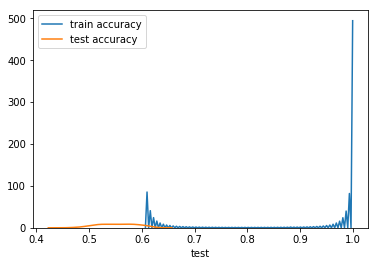

In [46]:
sns.distplot(accuracy['train'], hist = False, label = 'train accuracy')
sns.distplot(accuracy['test'], hist = False, label = 'test accuracy')

test set의 경우는 전체적으로 감소하는 트렌드를 보인다. 

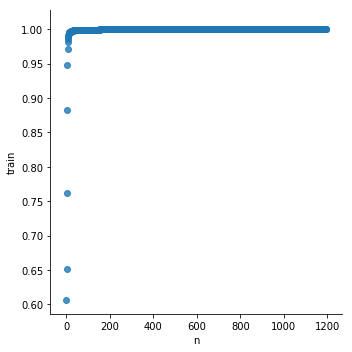

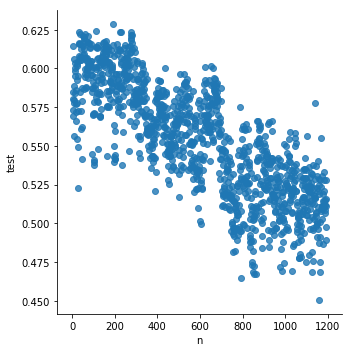

In [47]:
sns.lmplot(data = accuracy , x='n', y ='train', fit_reg = False)
sns.lmplot(data = accuracy , x='n', y ='test', fit_reg = False)

In [48]:
accuracy['test'].max()

0.62867112532713

In [49]:
accuracy[accuracy['test'] == accuracy['test'].max()] 

,train,test,n
188,0.999709,0.628671,189.0


사용자 정의함수 score를 조금 개조해 predict함수를 만들어본다. 

In [50]:
def predict(n, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, N = 100):
    data = vectorize(x_train, x_test, n)
    train = data[0]
    test = data[1]
    forest = RandomForestClassifier(n_estimators = N)
    forest = forest.fit(train, y_train)
    score1 = forest.score(train, y_train)
    score2 = forest.score(test, y_test)
    predict = forest.predict(test)
    return([predict])

가장 accuracy가 높게 나오는 n 값인 n = 189에 대하여 prediction 값을 직접 출력해 어떤 부분에서 예측을 제대로 하고 또 제대로 하지 못하였는지를 관찰해 볼 것이다. 가령 동일 시인의 작품이 train set에 있는 경우에 test set의 작품을 더 잘 predict할 수 있는지, 

In [51]:
prediction = predict(n = 189)

prediction을 살펴보며 train set에 동일 시인의 작품이 있는 경우는 예측을 더 잘하는가 여부를 살펴보았다. 큰 관련성은 없어보였다.

지금부터 아래에 등장하는 기법들은 나이브하게 적용만 해본 것이다.

### 1-(2) AdaBoostRegressor

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [53]:
def adaboost_predict(n, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, N = 100):
    data = vectorize(x_train, x_test, n)
    train = data[0]
    test = data[1]
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth = 1), n_estimators = 2000, 
        algorithm = "SAMME.R", learning_rate = 0.5)
    ada_clf = ada_clf.fit(train, y_train)
    score1 = ada_clf.score(train, y_train)
    score2 = ada_clf.score(test, y_test)
    predict = ada_clf.predict(test)
    return([score1, score2, predict])

In [54]:
adaboost_predict(189)

[0.6999224355245298,
 0.512067461471358,
 array(['M', 'M', 'M', ..., 'F', 'F', 'M'], dtype=object)]

random forest를 활용한 것에 비해서 test set과 train set의 accuracy의 차이가 더 적지만, 절대적 값으로는 열등하다

### (2) KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [60]:
def knn(n, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, N = 13):
    data = vectorize(x_train, x_test, n)
    train = data[0]
    test = data[1]
    clf = KNeighborsClassifier(n_neighbors = N)
    clf.fit(train, y_train)
    scoring = 'accuracy'
    score1 = cross_val_score(clf, train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
    score2 = clf.score(train, y_train)
    score3 = clf.score(test, y_test)
    predict = clf.predict(test)
    return([score1, score2, score3, predict])

In [61]:
knn(n=188) #차례로 train cross validation score, train score, test score이다.

[array([0.59302326, 0.60174419, 0.57848837, 0.60852713, 0.58874879,
        0.59941804, 0.57322987, 0.59068865, 0.59941804, 0.60329777]),
 0.6661818886949777,
 0.5562663564989823,
 array(['F', 'F', 'F', ..., 'M', 'M', 'M'], dtype=object)]

train set과 test set 사이에 차이가 많이 나지 않는다. 하지만 예측력은 낮은 편이다.

### (3) Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [76]:
def n_bayes(n, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test):
    data = vectorize(x_train, x_test, n)
    train = data[0]
    test = data[1]
    clf = GaussianNB()
    clf.fit(train, y_train)
    scoring = 'accuracy'
    score1 = cross_val_score(clf, train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
    score2 = clf.score(train, y_train)
    score3 = clf.score(test, y_test)
    predict = clf.predict(test)
    return([score1, score2, score3, predict])

In [77]:
n_bayes = n_bayes(n=188)

In [78]:
n_bayes

[array([0.45251938, 0.46802326, 0.46899225, 0.44670543, 0.46750727,
        0.4442289 , 0.46362755, 0.45974782, 0.44810863, 0.46944714]),
 0.459666472755478,
 0.5327129979645245,
 array(['M', 'F', 'F', ..., 'M', 'M', 'F'], dtype='<U1')]

### (4) SVC

In [79]:
from sklearn.svm import SVC

In [80]:
def svc(n, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test):
    data = vectorize(x_train, x_test, n)
    train = data[0]
    test = data[1]
    clf = SVC(gamma = 'auto')
    clf.fit(train, y_train)
    scoring = 'accuracy'
    score1 = cross_val_score(clf, train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
    score2 = clf.score(train, y_train)
    score3 = clf.score(test, y_test)
    predict = clf.predict(test)
    return([score1, score2, score3, predict])

In [81]:
svc(188)

[array([0.62790698, 0.63565891, 0.62112403, 0.61627907, 0.60038797,
        0.64306499, 0.6013579 , 0.61784675, 0.62172648, 0.63336566]),
 0.7858250921078146,
 0.6062808956091887,
 array(['M', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object)]